### Appending data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
real_data = pd.read_csv('preprocessed_phone_usage_data.csv', encoding='utf-8')
synth_data = pd.read_csv('synthetic_phone_usage.csv', encoding='utf-8')

In [3]:
real_data['synthetic'] = 0
synth_data['synthetic'] = 1

In [4]:
combined_data = pd.concat([real_data, synth_data], ignore_index=True)

In [5]:
combined_data.head()

,age,gender,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
0,0.1250,1,3,1,2,1,5,1,4,5,...,3,4.0,0.0,1,1,1,0,0,0,0
1,0.1250,1,3,1,1,1,5,1,3,5,...,3,4.0,0.0,1,1,1,1,0,0,0
2,0.1875,1,4,0,1,1,4,1,5,5,...,2,1.0,0.0,1,1,0,0,1,0,0
3,0.2500,1,2,1,4,1,3,1,4,3,...,3,2.0,1.0,1,1,1,0,0,0,0
4,0.2500,0,2,1,2,0,5,1,4,4,...,2,4.0,0.0,1,0,1,0,0,0,0


In [6]:
combined_data.shape

(1086, 22)

In [7]:
combined_data.to_csv('real+synth_phone_usage_data.csv', index=False)

In [8]:
df=combined_data.copy()

In [9]:
df.head()

,age,gender,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
0,0.1250,1,3,1,2,1,5,1,4,5,...,3,4.0,0.0,1,1,1,0,0,0,0
1,0.1250,1,3,1,1,1,5,1,3,5,...,3,4.0,0.0,1,1,1,1,0,0,0
2,0.1875,1,4,0,1,1,4,1,5,5,...,2,1.0,0.0,1,1,0,0,1,0,0
3,0.2500,1,2,1,4,1,3,1,4,3,...,3,2.0,1.0,1,1,1,0,0,0,0
4,0.2500,0,2,1,2,0,5,1,4,4,...,2,4.0,0.0,1,0,1,0,0,0,0


In [10]:
df = pd.get_dummies(df, columns=['gender'])

In [11]:
df.rename(columns={'gender_0': 'gender_Female', 'gender_1': 'gender_Male'}, inplace=True)

In [12]:
df.head()

,age,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,short_video_time,...,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic,gender_Female,gender_Male
0,0.1250,3,1,2,1,5,1,4,5,2,...,0.0,1,1,1,0,0,0,0,False,True
1,0.1250,3,1,1,1,5,1,3,5,3,...,0.0,1,1,1,1,0,0,0,False,True
2,0.1875,4,0,1,1,4,1,5,5,3,...,0.0,1,1,0,0,1,0,0,False,True
3,0.2500,2,1,4,1,3,1,4,3,2,...,1.0,1,1,1,0,0,0,0,False,True
4,0.2500,2,1,2,0,5,1,4,4,2,...,0.0,1,0,1,0,0,0,0,True,False


{'whiskers': [<matplotlib.lines.Line2D at 0x1ac3966c980>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac3966cef0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac395eff50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac3966d4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac3966d7f0>],
 'means': []}

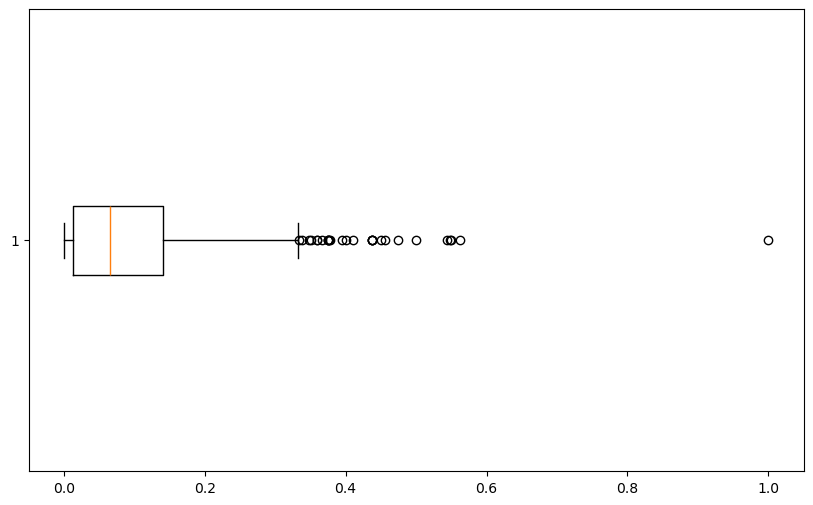

In [13]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['age'], vert=False)

In [14]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

{'whiskers': [<matplotlib.lines.Line2D at 0x1ac3a022d20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ac3a0232c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ac3a022a80>],
 'medians': [<matplotlib.lines.Line2D at 0x1ac3a023740>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ac3a0239e0>],
 'means': []}

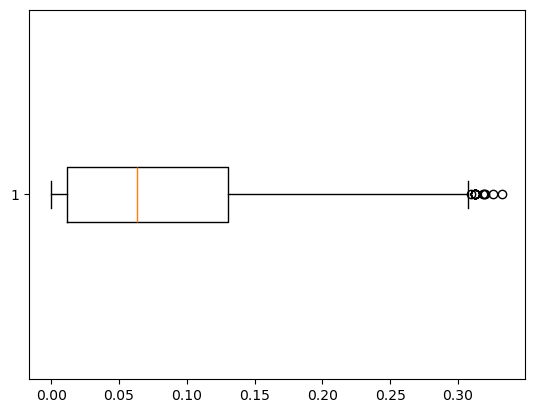

In [15]:
plt.boxplot(df['age'], vert=False)

In [16]:
df.shape

(1058, 23)

In [17]:
df.describe()

,age,daily_phone_hours,check_screen_time,phone_usage_satisfaction,used_screen_time_app,check_phone_morning,scroll_before_bed,phone_affects_grades,mindless_scrolling,short_video_time,...,reread_due_to_distraction,gpa,has_job,App_Social,App_Texting,App_Videos,App_StudyOrWork,App_Gaming,App_Shopping,synthetic
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,...,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,0.085693,2.179584,0.549149,2.593573,0.411153,4.086957,0.906427,3.883743,3.862949,2.159735,...,2.318526,3.081285,0.207940,0.900756,0.531191,0.554820,0.293951,0.137996,0.066163,0.928166
std,0.083029,0.719954,0.497814,1.124777,0.492276,1.023841,0.291371,1.142082,1.078353,0.873235,...,0.728951,1.037157,0.406025,0.299131,0.499262,0.497221,0.455785,0.345059,0.248684,0.258334
min,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.011600,2.000000,0.000000,2.000000,0.000000,4.000000,1.000000,3.000000,3.000000,2.000000,...,2.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.063100,2.000000,1.000000,3.000000,0.000000,4.000000,1.000000,4.000000,4.000000,2.000000,...,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.130450,3.000000,1.000000,3.000000,1.000000,5.000000,1.000000,5.000000,5.000000,3.000000,...,3.000000,4.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.332500,4.000000,1.000000,5.000000,1.000000,5.000000,1.000000,5.000000,5.000000,3.000000,...,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df_no_binary = df.loc[:, df.nunique() != 2]

<Axes: >

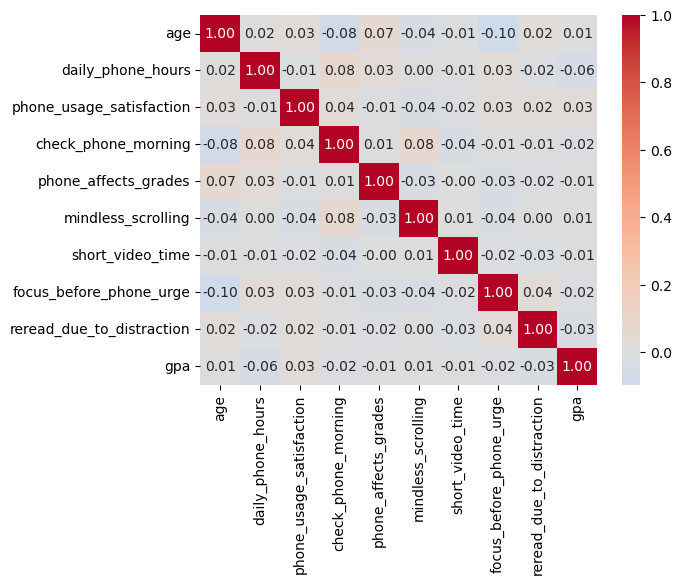

In [23]:
sns.heatmap(df_no_binary.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)

#### Data isn't very promising, abort